## LAB 10: Cliff Walking

Seepja Payasi



###### SARSA and Q-learning

Temporal Difference is a model-free reinforcement learning algorithm. This means that the agent learns through actual experience. SARSA and Q-Learning are the two control policies that will guide our agent in an environment and enable it to learn interesting things.

SARSA is acronym for State-Action-Reward-State-Action. It is also called on-policy, because the update process is consistent with the current policy.

The Q-learning always uses the max value of next state, in which case the state, action being taken to update the Q value may not be consistent with the current policy, thus it is called off-policy method. It’s exactly like SARSA with the only difference being — it doesn’t follow a policy to find the next action A’ but rather chooses the action in a greedy fashion.

### a. Using On-policy SARSA

Training...
Running Episode 0
Episode 0	Average Score: -2084.00 2021-11-29 18:48:09.859619
Episode 100	Average Score: -59.00 2021-11-29 18:48:10.415094
Episode 200	Average Score: -25.00 2021-11-29 18:48:10.615369
Episode 300	Average Score: -19.00 2021-11-29 18:48:10.821166
Episode 400	Average Score: -13.00 2021-11-29 18:48:10.937539
Episode 500	Average Score: -13.00 2021-11-29 18:48:11.020308
Episode 600	Average Score: -13.00 2021-11-29 18:48:11.104415
Episode 700	Average Score: -13.00 2021-11-29 18:48:11.248905
Episode 800	Average Score: -13.00 2021-11-29 18:48:11.353528
Episode 900	Average Score: -13.00 2021-11-29 18:48:11.422409
Running Episode 1000
Episode 1000	Average Score: -13.00 2021-11-29 18:48:11.575668
Episode 1100	Average Score: -13.00 2021-11-29 18:48:11.657991
Episode 1200	Average Score: -13.00 2021-11-29 18:48:11.736984
Episode 1300	Average Score: -13.00 2021-11-29 18:48:11.870675
Episode 1400	Average Score: -13.00 2021-11-29 18:48:11.949469
Episode 1500	Average Score: -

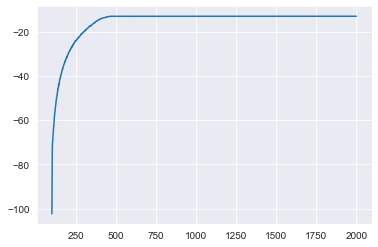

Testing...
-1.0


In [8]:
import gym
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

env = gym.make('CliffWalking-v0')

Q = np.zeros((env.observation_space.n,env.action_space.n))

def main():
    train()
    test()

def train():
    alpha = 0.9
    gamma = 0.1
    epsilon = 1.0
    epsilon_decay = 0.996
    max_episode_length = 400
    episodes = 2000

    print("Training...")

    i = 0
    all_rewards = np.zeros(episodes)

    j = 0

    while i < episodes:
        if i % 1000 == 0:
            print(f'Running Episode {i}')

        state = env.reset()
        action = epsilon_greedy(state, epsilon, i)
        done = False
        episode_length = 0
        total_episode_reward = 0

        while not done:

            next_state, reward, done, _ = env.step(action)

            next_action = epsilon_greedy(next_state, epsilon, i)

            Q[state, action] += alpha * (
                        reward + gamma * (Q[next_state, next_action] - Q[state, action]))

            epsilon = epsilon * epsilon_decay

            action = next_action
            state = next_state

            episode_length += 1
            total_episode_reward += reward

            if episode_length > max_episode_length:
                break

        all_rewards[i] = total_episode_reward
        if i % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f} {}'.format(i, total_episode_reward,
                                                                  datetime.now()))
        i += 1

    print(sum(all_rewards[-100:]) / 100)

    sns.set_style("darkgrid")
    ts = pd.Series(all_rewards)
    mean_smoothed_r = ts.rolling(window=100).mean()
    print(mean_smoothed_r.max())
    plt.plot(mean_smoothed_r)
    plt.show()
    plt.close()

def epsilon_greedy(state, epsilon, i):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state, :] + np.random.randn(1,env.action_space.n)*(1./(i+1)))

def test():
    print("Testing...")

    i = 0
    test_episodes = 100
    rewards = []
    while i < test_episodes:
        i += 1
        state = env.reset()
        done = False
        epochs, penalties = 0, 0
        while not done:
            action = np.argmax(Q[state, :])
            new_state, reward, done, info = env.step(action)
            epochs += 1
            state = new_state
        rewards.append(reward)

    print(f'{sum(rewards)/test_episodes}')

if __name__ == "__main__":
    main()

### b. Using Off-policy Q learning

Training...
Running Episode 0
Episode 0	Average Score: -2678.00 2021-11-29 18:48:13.271882
Episode 100	Average Score: -27.00 2021-11-29 18:48:13.946459
Episode 200	Average Score: -17.00 2021-11-29 18:48:14.165230
Episode 300	Average Score: -13.00 2021-11-29 18:48:14.370694
Episode 400	Average Score: -13.00 2021-11-29 18:48:14.529024
Episode 500	Average Score: -13.00 2021-11-29 18:48:14.671864
Episode 600	Average Score: -13.00 2021-11-29 18:48:14.791295
Episode 700	Average Score: -13.00 2021-11-29 18:48:14.912438
Episode 800	Average Score: -13.00 2021-11-29 18:48:15.054522
Episode 900	Average Score: -13.00 2021-11-29 18:48:15.212522
Running Episode 1000
Episode 1000	Average Score: -13.00 2021-11-29 18:48:15.367856
Episode 1100	Average Score: -13.00 2021-11-29 18:48:15.489299
Episode 1200	Average Score: -13.00 2021-11-29 18:48:15.577401
Episode 1300	Average Score: -13.00 2021-11-29 18:48:15.797835
Episode 1400	Average Score: -13.00 2021-11-29 18:48:15.919623
Episode 1500	Average Score: -

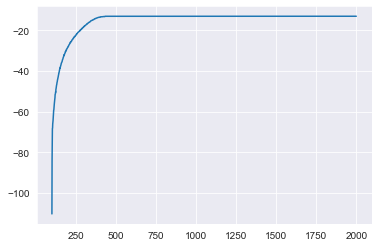

Testing...
-1.0


In [9]:
import random
from datetime import datetime

import gym
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

env = gym.make('CliffWalking-v0')

REWARD_SPACE = 3

alpha = 1
gamma = 0.1
epsilon = 1.0
epsilon_decay = 0.996
max_episode_length = 400
episodes = 2000

Q = np.zeros((env.observation_space.n, env.action_space.n))


def epsilon_greedy(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()

    else:
        return np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) * (1. / (i + 1)))


print("Training...")

i = 0
all_rewards = np.zeros(episodes)
all_episode_length = np.zeros(episodes)

j = 0

while i < episodes:
    if i % 1000 == 0:
        print(f'Running Episode {i}')

    state = env.reset()
    action = epsilon_greedy(state, epsilon)
    done = False
    episode_length = 0
    episode = []
    episode_reward = ['0'] * REWARD_SPACE
    total_episode_reward = 0

    while not done:

        action = epsilon_greedy(state, epsilon)
        next_state, reward, done, _ = env.step(action)

        Q[state, action] += alpha * (reward + gamma * (np.max(Q[next_state, :]) - Q[state, action]))

        epsilon = epsilon * epsilon_decay

        state = next_state

        episode_length += 1
        total_episode_reward += reward

        if episode_length > max_episode_length:
            break

    all_rewards[i] = total_episode_reward
    all_episode_length[i] = episode_length
    if i % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f} {}'.format(i, total_episode_reward,
                                                              datetime.now()))
    i += 1

print(sum(all_rewards[-100:]) / 100)

sns.set_style("darkgrid")
ts = pd.Series(all_rewards)
el = pd.Series(all_episode_length)
mean_smoothed_r = ts.rolling(window=100).mean()
print(mean_smoothed_r.max())
plt.plot(mean_smoothed_r)
plt.show()
plt.close()

print("Testing...")

i = 0
test_episodes = 100
rewards = []
while i < test_episodes:
    i += 1
    state = env.reset()
    done = False
    epochs, penalties = 0, 0
    while not done:
        # get_most_probable_path(state)
        action = np.argmax(Q[state, :])
        new_state, reward, done, info = env.step(action)
        epochs += 1
        state = new_state
    rewards.append(reward)

print(f'{sum(rewards)/test_episodes}')
